## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import strptime
import datetime
from datetime import datetime
import math
import warnings
warnings.filterwarnings('ignore')
import time
import csv
import glob
import logging
import importlib
import tweets_utils
import json
import seaborn as sns
import re
import matplotlib.cm as mcm
import plotly.express as px
%autosave 3600

Autosaving every 3600 seconds


## Indice
- [Utils](#utils)
- [CCDH and tweets process](#ccdh)
- [Process CCDH data](#Process_CCDH_data)
- [Active Bad Dozen interactions](#active)
- [Stats disinform](#stats_disinform)
- [New domain study](#new_urls)
- [Credibility](#credibility)
- [Date tweets](#dates)
- [Network](#network)

## Utils
<a id="utils"/>

In [22]:
users_link = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/csv/users_ccdh.csv")
users_disinform = pd.read_csv(users_link[0])
# users_disinform

In [3]:
def found(name, list_name=users_disinform["screen_name"]):
    for i in list_name:
        if(name == i):
            return True
    return False

In [23]:
path = "C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/csv/"
credibility_url = pd.read_csv(path + "domain_credibility.csv")
# credibility_url

## CCDH Research
<a id="ccdh"/>

### Process CCDH data
<a id="Process_CCDH_data"/>

In [5]:
path = "C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/csv/"
disinform = pd.read_csv(path + "disinformation_users.csv")
disinform

,screen_name,status
0,mercola,active
1,RobertKennedyJr,active
2,TyCharleneB,removed
3,BusyDrT,suspended
4,IslamRizza,removed
5,DrButtar,active
6,unhealthytruth,active
7,sayerjigmi,active
8,KellyBroganMD,active
9,DrChrisNorthrup,active


In [23]:
cols_tweets = [u'id', u'user_screen_name',u'user_id', u'created_at', 
               u'urls', u"rt_created_at", u"rt_user_id", u'hashtags',
               u"rt_user_screen_name", u'in_reply_to_user_id', 
               u'in_reply_to_screen_name', u'in_reply_to_status_id',
               u'quoted_status_created_at', "quoted_status_text", "quoted_user_id"]

files_tweets = glob.glob("F:/Supsi/COVID-19-Tweets/*/tweets.csv")

In [24]:
for chunk in pd.read_csv(files_tweets[0], usecols=cols_tweets, chunksize=10, lineterminator = '\n'):
    break
chunk.head()

,id,created_at,user_id,user_screen_name,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,rt_created_at,rt_user_id,rt_user_screen_name,quoted_status_text,quoted_status_created_at,quoted_user_id,hashtags,urls
0,1219752899636613121,Tue Jan 21 22:45:27 +0000 2020,1110906564158869505,Huerconetzin,NaN,NaN,NaN,Tue Jan 21 19:09:49 +0000 2020,1.865051e+07,AnneKPIX,NaN,NaN,NaN,"[{'text': 'coronavirus', 'indices': [94, 106]}]",[]
1,1219768733310291969,Tue Jan 21 23:48:22 +0000 2020,1214557289606242304,JustAnotherAme4,NaN,NaN,NaN,Tue Jan 21 21:33:16 +0000 2020,2.097571e+06,cnni,NaN,NaN,NaN,[],[]
2,1219768903116607488,Tue Jan 21 23:49:03 +0000 2020,426033838,HHSRegion8,NaN,NaN,NaN,Tue Jan 21 20:57:06 +0000 2020,1.465700e+08,CDCgov,NaN,NaN,NaN,"[{'text': 'coronavirus', 'indices': [47, 59]}]",[]
3,1219753863940648965,Tue Jan 21 22:49:17 +0000 2020,2252416118,Paxman42,NaN,NaN,NaN,Tue Jan 21 22:20:07 +0000 2020,7.865932e+17,OurWarOnCancer,NaN,NaN,NaN,"[{'text': 'lungcancer', 'indices': [103, 114]}]",[]
4,1219755288988798981,Tue Jan 21 22:54:57 +0000 2020,738000529775697920,beerhowell,NaN,NaN,NaN,Tue Jan 21 18:37:41 +0000 2020,8.070950e+05,nytimes,NaN,NaN,NaN,[],[]


In [1]:
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
data = pd.DataFrame()
for filename in files_tweets:
    print(f"Reading file: {filename}")
    result.extend(tweets_utils.process_all_data(filename, cols_tweets, True, users_disinform["screen_name"]))
    lista = result[j]
    j = j + 1
    print(f"Mese numero {j}")
    for i in range(len(lista)):
        data = data.append(lista[i]["df"])
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

### Active Bad Dozen interactions
<a id="active"/>

In [2]:
path = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/large_files/ccdh/")[0]

In [3]:
path = "C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/large_files/ccdh/"
ccdh_tweets = pd.read_csv(path + "bad_dozen.csv", lineterminator="\n", low_memory=False)

In [6]:
ccdh_tweets = ccdh_tweets[ccdh_tweets["user_screen_name"].isin(disinform["screen_name"])]

In [7]:
ccdh_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19159 entries, 0 to 115871
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         19159 non-null  int64  
 1   created_at                 19159 non-null  object 
 2   user_id                    19159 non-null  float64
 3   user_screen_name           19159 non-null  object 
 4   in_reply_to_status_id      1622 non-null   float64
 5   in_reply_to_user_id        1702 non-null   float64
 6   in_reply_to_screen_name    1702 non-null   object 
 7   rt_created_at              2834 non-null   object 
 8   rt_user_id                 2834 non-null   float64
 9   rt_user_screen_name        2834 non-null   object 
 10  quoted_status_text         1168 non-null   object 
 11  quoted_status_created_at   1168 non-null   object 
 12  quoted_user_id             1168 non-null   float64
 13  hashtags                   19159 non-null  ob

In [8]:
ccdh_rt = ccdh_tweets[ccdh_tweets['rt_created_at'].notna()]
ccdh_original = ccdh_tweets[ccdh_tweets['rt_created_at'].isna() & ccdh_tweets['in_reply_to_status_id'].isna()
                           & ccdh_tweets['quoted_status_created_at'].isna()]
ccdh_quote = ccdh_tweets[ccdh_tweets['rt_created_at'].isna() & ccdh_tweets['in_reply_to_status_id'].isna()
                           & ccdh_tweets['quoted_status_created_at'].notna()]
ccdh_reply = ccdh_tweets[ccdh_tweets['in_reply_to_status_id'].notna()]

In [17]:
ccdh_urls = ccdh_tweets["urls"]

In [13]:
prova = ccdh_tweets[ccdh_tweets["quoted_status_id"].notna()]

In [14]:
prova.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1747 entries, 106 to 27499
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1747 non-null   int64  
 1   created_at                 1747 non-null   object 
 2   user_id                    1747 non-null   float64
 3   user_screen_name           1747 non-null   object 
 4   in_reply_to_status_id      0 non-null      float64
 5   in_reply_to_user_id        20 non-null     float64
 6   in_reply_to_screen_name    20 non-null     object 
 7   rt_created_at              226 non-null    object 
 8   rt_user_id                 226 non-null    float64
 9   rt_user_screen_name        226 non-null    object 
 10  quoted_status_text         1152 non-null   object 
 11  quoted_status_created_at   1152 non-null   object 
 12  quoted_user_id             1152 non-null   float64
 13  hashtags                   1747 non-null   ob

In [21]:
x = ccdh_tweets[["id", "user_screen_name", "text", "in_reply_to_status_id", "rt_user_screen_name", "quoted_status_id", "quoted_status_text", "quoted_status_created_at"]]

In [25]:
x[x["quoted_status_id"].notna() & x["rt_user_screen_name"].notna()]

,id,user_screen_name,text,in_reply_to_status_id,rt_user_screen_name,quoted_status_id,quoted_status_text,quoted_status_created_at
382,1400098025675055107,mercola,#FauciLied when he told Sen. Paul that Shi Zhe...,NaN,AlexisBadenMaye,1.397592e+18,NaN,NaN
498,1389222270707642368,mercola,Pictured on the left: not a doctor.\nPictured ...,NaN,stillgray,1.388319e+18,NaN,NaN
810,1364910270011895809,mercola,"If you can't get the book, read his latest art...",NaN,DJKatie888,1.364606e+18,NaN,NaN
1391,1316357205071929344,mercola,If more people would protect their immune syst...,NaN,ValTheeGal,1.316031e+18,NaN,NaN
1421,1313817749135687680,mercola,#Vitamin D3 Baby!! #sunshine #StopCOVIdcold .c...,NaN,ladybugpicnics,1.313516e+18,NaN,NaN
...,...,...,...,...,...,...,...,...
22152,851858377164693504,kevdjenkins1,@DanteAtkins @Marmel I guess I made this joke ...,NaN,JaymayAllDay,8.514412e+17,NaN,NaN
22154,850654503573606401,kevdjenkins1,Here's what The Leader said in 2012 about laun...,NaN,MMFlint,2.557846e+17,NaN,NaN
22155,849648124285128704,kevdjenkins1,Who gives a damn abt what's important to Jared...,NaN,CharlesMBlow,8.496437e+17,NaN,NaN
22206,836011096372887552,kevdjenkins1,@JoeNBC @nyt @cnn @wsj @HuffingtonPost @TheRev...,NaN,PammMalveaux,8.350258e+17,NaN,NaN


In [28]:
x[x["quoted_status_created_at"].isna() & x["text"].notna() & x["quoted_status_id"].notna()]

,id,user_screen_name,text,in_reply_to_status_id,rt_user_screen_name,quoted_status_id,quoted_status_text,quoted_status_created_at
115,1422556921308012553,mercola,Interesting speech – are we in a war we cannot...,NaN,NaN,1.420858e+18,NaN,NaN
145,1420387933887074306,mercola,Thank you for the explanation https://t.co/FzR...,NaN,NaN,1.420326e+18,NaN,NaN
185,1418545311161757700,mercola,What could she possibly mean? https://t.co/fDo...,NaN,NaN,1.418314e+18,NaN,NaN
204,1417574892959113225,mercola,This looks fantastic https://t.co/6wCzwX47tV,NaN,NaN,1.417542e+18,NaN,NaN
209,1417193834497327105,mercola,The COVID mandatory vaccination ride is going ...,NaN,NaN,1.417170e+18,NaN,NaN
...,...,...,...,...,...,...,...,...
22152,851858377164693504,kevdjenkins1,@DanteAtkins @Marmel I guess I made this joke ...,NaN,JaymayAllDay,8.514412e+17,NaN,NaN
22154,850654503573606401,kevdjenkins1,Here's what The Leader said in 2012 about laun...,NaN,MMFlint,2.557846e+17,NaN,NaN
22155,849648124285128704,kevdjenkins1,Who gives a damn abt what's important to Jared...,NaN,CharlesMBlow,8.496437e+17,NaN,NaN
22206,836011096372887552,kevdjenkins1,@JoeNBC @nyt @cnn @wsj @HuffingtonPost @TheRev...,NaN,PammMalveaux,8.350258e+17,NaN,NaN


### Stats disinform
<a id="stats_disinform"/>

In [18]:
importlib.reload(tweets_utils)
tweets_utils.stats(len(ccdh_tweets), 
      len(ccdh_original), len(ccdh_rt), len(ccdh_reply), len(ccdh_quote))

Number of total tweets: 19159
Number of original tweets: 13535
Number of retweets: 2834
Number of replies: 1622
Number of quotes: 1168
Number of original_tweets: 70.65% of total tweets
Number of retweets: 14.79% of total tweets
Number of replies: 8.47% of total tweets
Number of quotes: 6.1% of total tweets
Check sum == len(tweets):  True


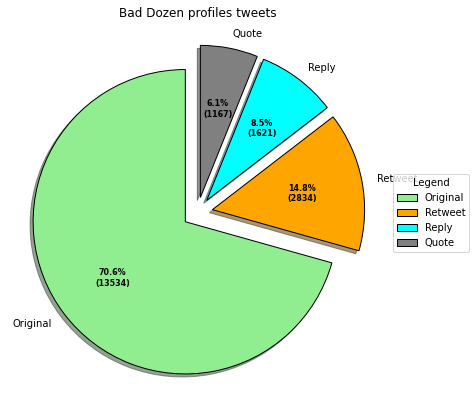

In [20]:
tweets_utils.print_pie_chart4("Bad Dozen profiles tweets","Original","Retweet", "Reply", "Quote",
      len(ccdh_original), len(ccdh_rt), len(ccdh_reply), len(ccdh_quote))